# Gravimetry Electronic Lab Book

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Theory
The period of oscillation of a pendulum $T = 2 \pi \sqrt{\frac{L}{g}}$

So, we get $ g = \frac{4 \pi^2 L}{T^2}$. This works best if we have a very light pendulum, (here the calculation assumes the pendulum is massles). so using a string or thin wire is best. This also assumes small angles, and no air resistance.

## Experiment Procedures
The simplest way would be to tie a mass to a string, measure the length (and uncertainty) then let it oscillate by displacing it w/ small angles. Repeat this for different string lengths.

We can record the oscillation using a phone, then analyzing the footage with tracker. For calibration, we can use a meter ruler in the same plane as the oscillation.

## Error Analysis
For direct measurements, such as that of the length of the string and the period we use the usual formulas for mean and standard deviation stats.mean(array) for the mean, stats.tstd(array) for the standard deviation.

### $g$ Error Propogation
here, we have $ \sigma_g^2 = (\frac{-8L \pi^2}{T^3})^2 \sigma_T^2 + (\frac{4\pi^2}{T^2}) ^2\sigma_L^2$

This was derived using the error propogation discussed in mathematical techniques class. It could be worth considering,after calculating g and it's standard deviation for each trial, we weight each value of g with $\frac{1}{\sigma_g^2}$ since if the standard deviation is lower, the uncertainty is lower.

In [6]:
#function for returning mean and standard deviation of an array
def mean_std(a):
    return stats.tmean(a),stats.tstd(a)
#given arrays of L, and T, return array of g
def calc_g(L,T):
    return (4*np.power(np.pi,2)*L)/(np.power(T,2))
#calculate the standard deviation of g
def g_std(mean_l,std_l,mean_t,std_t):
    a = np.power((-8*mean_l*np.power(np.pi,2))/(np.power(mean_t,3)),2)   
    b = np.power((4*np.power(np.pi,2))/(np.power(mean_t,2)),2) 
    return np.sqrt(a*np.power(std_t,2)+b*np.power(std_l,2))
#expects g an array of tuples =(g,std of g)
def weighted_g(g):
    mean = 0
    w = 0
    for i in g:
        a = np.power(1/i[1],2)
        w+= a
        mean+= a*i[0]
    mean=mean/w
    std= np.sqrt(1/w)
    return mean,std

In [7]:

#finds the index of the point with an x position closest to pos[st_index] in the interval of time between time[st_index] +lower, time[st_index]+upper
def find_closest(time,pos,st_index,lower,upper):
    ind = st_index +1 
    closest = ind
    while True:
        if ind > len(time)-1:
            break
        if time[ind] >= time[st_index]+ upper:
            break
        if time[ind] <= time[st_index] + lower:
            ind+=1
            closest = ind
        else:
            if abs(pos[st_index]- pos[ind]) <= abs(pos[st_index]-pos[closest]):
                closest = ind
            ind+=1
    return closest
#returns an array of periods based on each oscillation in the trial
#warning, ind must be an index of a maximum! we are measuring the time difference between maximums to determine the period
def find_periods(time,pos,ind,lower,upper):
    index =ind 
    periods = []
    while time[index]+ upper <= time[-1]:
        closest = find_closest(time,pos,index,lower,upper)
        periods.append(time[closest]-time[index])
        #here, we choose the index of the local maximum around pos[closest]
        a = max(closest-7,0)
        b= min(len(time)-1,closest+7)
        index = np.argmax(pos[a:b]) + a
    return periods

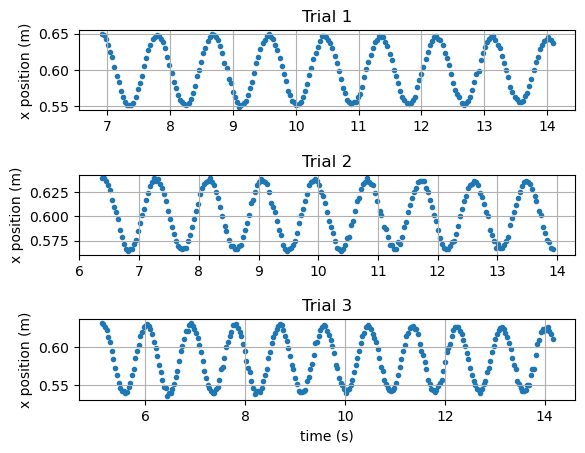

In [8]:
#recording the fishwire lengths
L =np.array([0.203,0.203,0.203,0.202,0.203])
length = mean_std(L)
#these contain the x position, and time of the oscillations. 3 trials were recorded
trial_1 = np.loadtxt('L1_1.csv',delimiter = ',',skiprows = 2)
trial_2 =  np.loadtxt('L1_2.csv',delimiter = ',',skiprows = 2)
trial_3 = np.loadtxt('L1_3.csv',delimiter = ',',skiprows = 2)
#seperating the time and x position columns for each trial
time_1=trial_1[:,0]
pos_1 = trial_1[:,1]
time_2 = trial_2[:,0]
pos_2 = trial_2[:,1]
time_3 = trial_3[:,0]
pos_3 = trial_3[:,1]
plt.subplot(311)
plt.title('Trial 1')
plt.ylabel('x position (m)')
plt.scatter(time_1,pos_1,marker = '.')
plt.grid(True)

plt.subplot(312)
plt.title('Trial 2')
plt.ylabel('x position (m)')
plt.scatter(time_2,pos_2,marker = '.')
plt.grid(True)

plt.subplot(313)
plt.title('Trial 3')
plt.xlabel('time (s)')
plt.ylabel('x position (m)')
plt.scatter(time_3,pos_3,marker = '.')
plt.grid(True)
plt.subplots_adjust(hspace = 0.8)


In [9]:
#extracting the periods from each oscillation
periods_1 = find_periods(time_1,pos_1,0,0.3,1.3)
periods_2 = find_periods(time_2,pos_2,0,0.3,1.3)
periods_3 = find_periods(time_3,pos_3,0,0.3,1.3)
# extracting the average and standard deviation of each
period_1 = mean_std(periods_1)
period_2 = mean_std(periods_2)
period_3 = mean_std(periods_3)

In [10]:
#getting the values of g from each trial
g1 = calc_g(length[0],period_1[0])
g1_err = g_std(length[0],length[1],period_1[0],period_1[1])
g2 = calc_g(length[0],period_2[0])
g2_err = g_std(length[0],length[1],period_2[0],period_2[1])
g3 = calc_g(length[0],period_3[0])
g3_err = g_std(length[0],length[1],period_3[0],period_3[1])
print('g1 is {0:.2f} +- {1:.2f}'.format(g1,g1_err))  
print('g2 is {0:.2f}+- {1:.2f}'.format(g2,g2_err))
print('g3 is {0:.2f} +- {1:.2f}'.format(g3,g3_err))
g = [(g1,g1_err),(g2,g2_err),(g3,g3_err)]
a = weighted_g(g)
print('The weighted g value is {0:.2f} +- {1:.2f}'.format(a[0],a[1]))


g1 is 9.87 +- 0.36
g2 is 9.94+- 0.80
g3 is 9.91 +- 0.53
The weighted g value is 9.89 +- 0.28
